# Installing and Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Loading the Dataset

Reliance

In [ ]:
stock = "RELIANCE.NS"
ticker = yf.Ticker(stock)
dataset = ticker.history(period = "max").iloc[:, 0:1].values

In [ ]:
training_set = dataset[:int(0.8 * dataset.shape[0])]
test_set = dataset[int(0.8 * dataset.shape[0]):]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 64, return_sequences = True))
#regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 32, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
178/178 [==============================] - 15s 61ms/step - loss: 0.0024
Epoch 2/10
178/178 [==============================] - 11s 61ms/step - loss: 7.1989e-04
Epoch 3/10
178/178 [==============================] - 10s 54ms/step - loss: 6.7912e-04
Epoch 4/10
178/178 [==============================] - 11s 61ms/step - loss: 6.3035e-04
Epoch 5/10
178/178 [==============================] - 11s 62ms/step - loss: 5.2166e-04
Epoch 6/10
178/178 [==============================] - 11s 61ms/step - loss: 5.1589e-04
Epoch 7/10
178/178 [==============================] - 13s 74ms/step - loss: 5.2747e-04
Epoch 8/10
178/178 [==============================] - 11s 60ms/step - loss: 4.6810e-04
Epoch 9/10
178/178 [==============================] - 10s 57ms/step - loss: 4.2376e-04
Epoch 10/10
178/178 [==============================] - 11s 62ms/step - loss: 4.1847e-04


In [ ]:
inputs = dataset[len(dataset) - len(test_set) - 60:]
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 18ms/step


In [ ]:
print(predicted_stock_price.shape)
print(test_set.shape)

(60, 1)
(1434, 1)


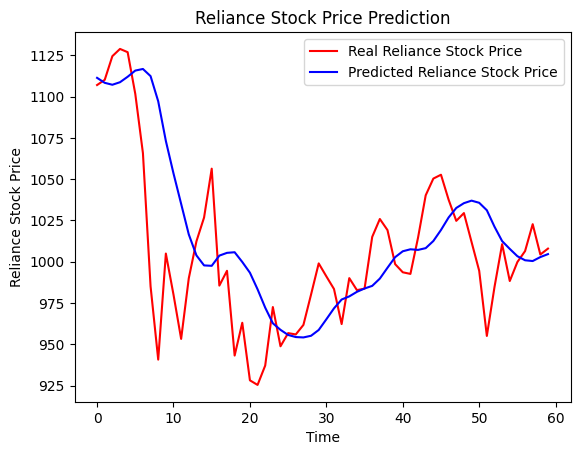

In [ ]:
plt.plot(test_set[:60], color = 'red', label = 'Real Reliance Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Reliance Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [ ]:
regressor.save('Reliance_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


SBI

In [ ]:
stock = "SBIN.NS"
ticker = yf.Ticker(stock)
dataset = ticker.history(period = "max").iloc[:, 0:1].values

In [ ]:
training_set = dataset[:int(0.8 * dataset.shape[0])]
test_set = dataset[int(0.8 * dataset.shape[0]):]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 32, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
178/178 [==============================] - 23s 91ms/step - loss: 0.0066
Epoch 2/10
178/178 [==============================] - 17s 96ms/step - loss: 0.0021
Epoch 3/10
178/178 [==============================] - 16s 92ms/step - loss: 0.0019
Epoch 4/10
178/178 [==============================] - 18s 100ms/step - loss: 0.0021
Epoch 5/10
178/178 [==============================] - 17s 93ms/step - loss: 0.0016
Epoch 6/10
178/178 [==============================] - 17s 93ms/step - loss: 0.0015
Epoch 7/10
178/178 [==============================] - 16s 92ms/step - loss: 0.0014
Epoch 8/10
178/178 [==============================] - 18s 102ms/step - loss: 0.0014
Epoch 9/10
178/178 [==============================] - 17s 93ms/step - loss: 0.0015
Epoch 10/10
178/178 [==============================] - 17s 93ms/step - loss: 0.0012


In [ ]:
inputs = dataset[len(dataset) - len(test_set) - 60:]
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 25ms/step


In [ ]:
print(predicted_stock_price.shape)
print(test_set.shape)

(60, 1)
(1434, 1)


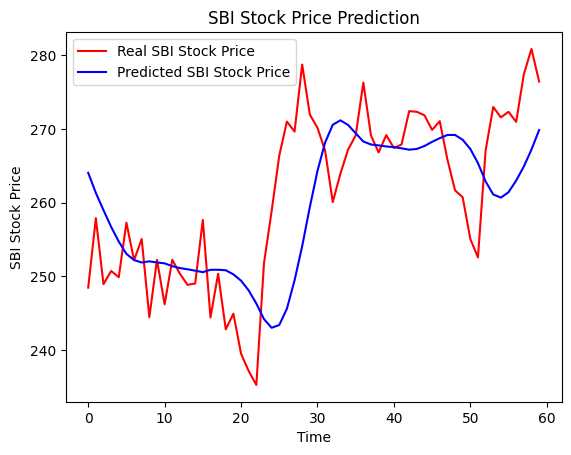

In [ ]:
plt.plot(test_set[:60], color = 'red', label = 'Real SBI Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [ ]:
regressor.save('SBI_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


HDFC

In [ ]:
stock = "HDFCBANK.NS"
ticker = yf.Ticker(stock)
dataset = ticker.history(period = "max").iloc[:, 0:1].values

In [ ]:
training_set = dataset[:int(0.8 * dataset.shape[0])]
test_set = dataset[int(0.8 * dataset.shape[0]):]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 64, return_sequences = True))
#regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 32, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
178/178 [==============================] - 15s 65ms/step - loss: 0.0025
Epoch 2/10
178/178 [==============================] - 13s 75ms/step - loss: 7.1553e-04
Epoch 3/10
178/178 [==============================] - 11s 63ms/step - loss: 6.4738e-04
Epoch 4/10
178/178 [==============================] - 11s 62ms/step - loss: 6.7898e-04
Epoch 5/10
178/178 [==============================] - 10s 58ms/step - loss: 5.3825e-04
Epoch 6/10
178/178 [==============================] - 11s 61ms/step - loss: 5.3074e-04
Epoch 7/10
178/178 [==============================] - 11s 64ms/step - loss: 5.0243e-04
Epoch 8/10
178/178 [==============================] - 11s 64ms/step - loss: 5.6289e-04
Epoch 9/10
178/178 [==============================] - 11s 63ms/step - loss: 4.7547e-04
Epoch 10/10
178/178 [==============================] - 11s 61ms/step - loss: 4.4266e-04


In [ ]:
inputs = dataset[len(dataset) - len(test_set) - 60:]
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 18ms/step


In [ ]:
print(predicted_stock_price.shape)
print(test_set.shape)

(60, 1)
(1435, 1)


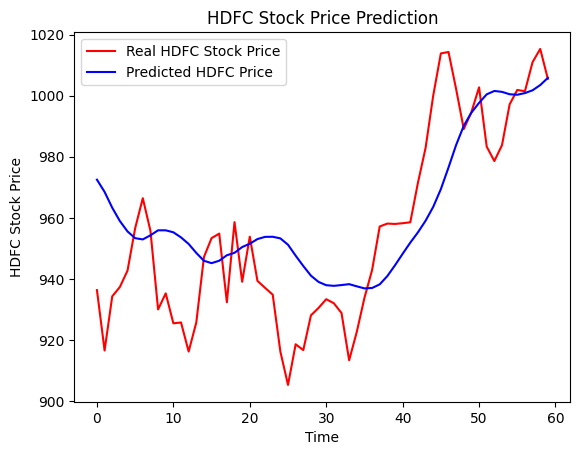

In [ ]:
plt.plot(test_set[:60], color = 'red', label = 'Real HDFC Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted HDFC Price')
plt.title('HDFC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HDFC Stock Price')
plt.legend()
plt.show()

In [ ]:
regressor.save('HDFC_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


TCS

In [ ]:
stock = "TCS.NS"
ticker = yf.Ticker(stock)
dataset = ticker.history(period = "max").iloc[:, 0:1].values

In [ ]:
training_set = dataset[:int(0.8 * dataset.shape[0])]
test_set = dataset[int(0.8 * dataset.shape[0]):]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 64, return_sequences = True))
#regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 32, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
135/135 [==============================] - 13s 63ms/step - loss: 0.0049
Epoch 2/10
135/135 [==============================] - 9s 65ms/step - loss: 0.0012
Epoch 3/10
135/135 [==============================] - 7s 55ms/step - loss: 0.0011
Epoch 4/10
135/135 [==============================] - 9s 67ms/step - loss: 0.0011
Epoch 5/10
135/135 [==============================] - 8s 63ms/step - loss: 0.0011
Epoch 6/10
135/135 [==============================] - 8s 58ms/step - loss: 0.0010
Epoch 7/10
135/135 [==============================] - 9s 65ms/step - loss: 8.9618e-04
Epoch 8/10
135/135 [==============================] - 7s 55ms/step - loss: 9.0177e-04
Epoch 9/10
135/135 [==============================] - 9s 65ms/step - loss: 8.3119e-04
Epoch 10/10
135/135 [==============================] - 9s 67ms/step - loss: 8.3553e-04


In [ ]:
inputs = dataset[len(dataset) - len(test_set) - 60:]
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
print(predicted_stock_price.shape)
print(test_set.shape)

In [ ]:
plt.plot(test_set[:60], color = 'red', label = 'Real TCS Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()

In [ ]:
regressor.save('TCS_model.h5')

Adani ENT

In [ ]:
stock = "ADANIENT.NS"
ticker = yf.Ticker(stock)
dataset = ticker.history(period = "max").iloc[:, 0:1].values

In [ ]:
training_set = dataset[:int(0.8 * dataset.shape[0])]
test_set = dataset[int(0.8 * dataset.shape[0]):]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 64, return_sequences = True))
#regressor.add(Dropout(0.2))
#regressor.add(LSTM(units = 32, return_sequences = True))
#regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
135/135 [==============================] - 12s 57ms/step - loss: 0.0023
Epoch 2/10
135/135 [==============================] - 6s 46ms/step - loss: 8.3326e-04
Epoch 3/10
135/135 [==============================] - 8s 56ms/step - loss: 7.7295e-04
Epoch 4/10
135/135 [==============================] - 6s 45ms/step - loss: 6.8755e-04
Epoch 5/10
135/135 [==============================] - 7s 56ms/step - loss: 6.1238e-04
Epoch 6/10
135/135 [==============================] - 6s 45ms/step - loss: 5.8365e-04
Epoch 7/10
135/135 [==============================] - 8s 56ms/step - loss: 5.0632e-04
Epoch 8/10
135/135 [==============================] - 6s 46ms/step - loss: 6.1065e-04
Epoch 9/10
135/135 [==============================] - 8s 57ms/step - loss: 5.1898e-04
Epoch 10/10
135/135 [==============================] - 6s 46ms/step - loss: 5.2676e-04


In [ ]:
inputs = dataset[len(dataset) - len(test_set) - 60:]
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 33ms/step


In [ ]:
print(predicted_stock_price.shape)
print(test_set.shape)

(60, 1)
(1096, 1)


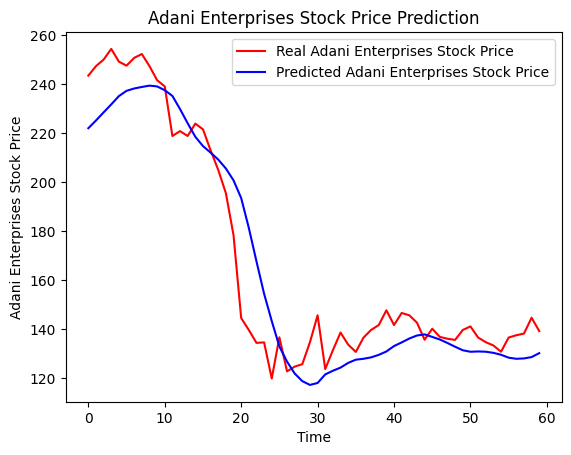

In [ ]:
plt.plot(test_set[:60], color = 'red', label = 'Real Adani Enterprises Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Adani Enterprises Stock Price')
plt.title('Adani Enterprises Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Adani Enterprises Stock Price')
plt.legend()
plt.show()

In [ ]:
regressor.save('AdaniENT_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Example

In [ ]:
stock = "AAPL"
ticker = yf.Ticker(stock)
dataset = ticker.history(period = "max").iloc[:, 0:1].values

In [ ]:
training_set = dataset[:int(0.8 * dataset.shape[0])]
test_set = dataset[int(0.8 * dataset.shape[0]):]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Training the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 32, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 32, return_sequences = True))
regressor.add(Dropout(0.2))
# regressor.add(LSTM(units = 32, return_sequences = True))
# regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 32))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
273/273 [==============================] - 25s 71ms/step - loss: 0.0031
Epoch 2/10
273/273 [==============================] - 18s 67ms/step - loss: 8.5122e-04
Epoch 3/10
273/273 [==============================] - 18s 68ms/step - loss: 8.3132e-04
Epoch 4/10
273/273 [==============================] - 19s 70ms/step - loss: 7.5065e-04
Epoch 5/10
273/273 [==============================] - 18s 67ms/step - loss: 6.5131e-04
Epoch 6/10
273/273 [==============================] - 19s 71ms/step - loss: 7.0359e-04
Epoch 7/10
273/273 [==============================] - 18s 67ms/step - loss: 7.0991e-04
Epoch 8/10
273/273 [==============================] - 20s 72ms/step - loss: 6.5425e-04
Epoch 9/10
273/273 [==============================] - 18s 67ms/step - loss: 6.4067e-04
Epoch 10/10
273/273 [==============================] - 19s 68ms/step - loss: 7.0698e-04


# Testing the Model

In [ ]:
inputs = dataset[len(dataset) - len(test_set) - 60:]
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 18ms/step


In [ ]:
print(predicted_stock_price.shape)
print(test_set.shape)

(60, 1)
(2199, 1)


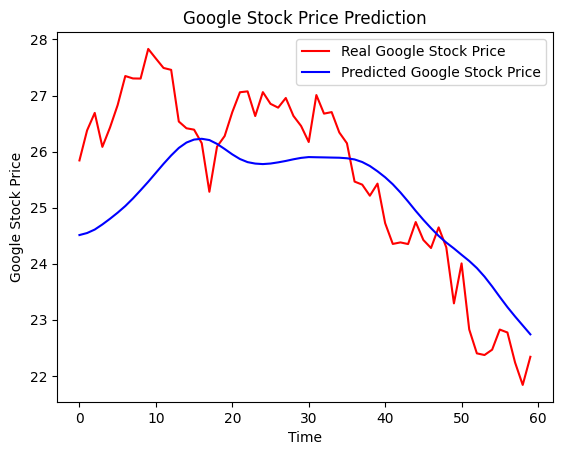

In [ ]:
plt.plot(test_set[:60], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
np.sum(np.abs(test_set[:60] - predicted_stock_price)) / 60

0.932485461850209

In [ ]:
from google.colab import files
files.download('SBI_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('TCS_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow import keras
reconstructed_model = keras.models.load_model("SBI_model.h5")

In [ ]:
reconstructed_model.predict(X_test)

2/2 [==============================] - 1s 23ms/step


array([[0.83413225],
       [0.837051  ],
       [0.8418488 ],
       [0.84858006],
       [0.8549574 ],
       [0.8607978 ],
       [0.8665784 ],
       [0.873161  ],
       [0.8799968 ],
       [0.88640904],
       [0.89304096],
       [0.8990883 ],
       [0.9037056 ],
       [0.90662307],
       [0.90591675],
       [0.90188634],
       [0.8956657 ],
       [0.888042  ],
       [0.8782848 ],
       [0.8692483 ],
       [0.86246043],
       [0.8592268 ],
       [0.8600234 ],
       [0.8639607 ],
       [0.86876464],
       [0.8742169 ],
       [0.8791681 ],
       [0.882966  ],
       [0.8858418 ],
       [0.8871664 ],
       [0.88672346],
       [0.8843141 ],
       [0.8824175 ],
       [0.8808978 ],
       [0.8798767 ],
       [0.87851566],
       [0.87636936],
       [0.8721639 ],
       [0.86630136],
       [0.8592625 ],
       [0.8524487 ],
       [0.8451341 ],
       [0.8370443 ],
       [0.828906  ],
       [0.8213998 ],
       [0.81590396],
       [0.81198245],
       [0.809